# Shallow water model
## HW3
### Kelsey Malloy


### <i>last edited: 11/2020</i>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from Diagnostics import calc_budget, avg_x, avg_y, d_dx, d_dy
from RKPackage import RK3Step 
from SWE_RHS import SWE_RHS
from Plotting import DefinePlot, UpdatePlots
from IC_BC import gauss,wave,BC

### Set geometry

In [10]:
nx = 64 # number of x pts
ny = 32 # number of y pts
lx = 1280 # length of x
ly = 640 # length of y
dx = float(lx)/nx # distance between x pts
dy = float(ly)/ny # distance between y pts
dxx = dx
dyy = dy
print(dx,dy,dxx,dyy)

# centered grid -- p points
xc = (-lx/2)+np.arange(nx)*(dx)
yc = (-ly/2)+np.arange(ny)*(dy)
XP,YP = np.meshgrid(xc,yc)
print('Centered grid shape (pressure points): ',XP.shape)

# x-staggered grid -- u points
xstag = ((-lx/2)-dx/2)+np.arange(nx+1)*dx
print(xc[:2],xc[-2:],xstag[:2],xstag[-2:])
XU,YU = np.meshgrid(xstag,yc)
print('X-staggered grid shape (u points): ',XU.shape)

# y-staggered grid -- v points
ystag = ((-ly/2)-dy/2)+np.arange(ny+1)*dy
print(yc[:2],yc[-2:],ystag[:2],ystag[-2:])
XV,YV = np.meshgrid(xc,ystag)
print('Y-staggered grid shape (v points): ',XV.shape)

# x-staggered and y-staggered -- z points
XZ,YZ = np.meshgrid(xstag,ystag)
print('X- and Y-staggered grid shape (vort points): ',XZ.shape)

20.0 20.0 20.0 20.0
Centered grid shape (pressure points):  (32, 64)
[-640. -620.] [600. 620.] [-650. -630.] [610. 630.]
X-staggered grid shape (u points):  (32, 65)
[-320. -300.] [280. 300.] [-330. -310.] [290. 310.]
Y-staggered grid shape (v points):  (33, 64)
X- and Y-staggered grid shape (vort points):  (33, 65)


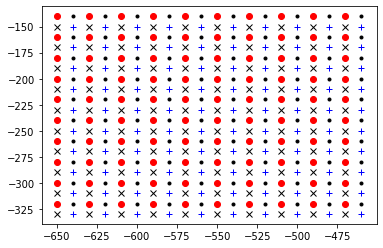

In [11]:
plt.plot(XP[:10,:10],YP[:10,:10],'k.')
plt.plot(XU[:10,:10],YU[:10,:10],'ro')
plt.plot(XV[:10,:10],YV[:10,:10],'b+')
plt.plot(XZ[:10,:10],YZ[:10,:10],'kx')
plt.show()

### Set parameters

In [12]:
g=10.
depth = 10. 

### Set time step and interval

In [13]:
nt = 256+1 # number of timesteps
dt = .1 # timestep interval
#test = 2/10

snapfreq = 32 # how often to plot or print energy/enstrophy
print('How many time steps will plot (not including IC): ',(nt-1)/snapfreq)

How many time steps will plot (not including IC):  8.0


### Initial conditions

In [48]:
# initialize arrays
p = np.zeros((int(nt),ny,nx))
u = np.zeros((int(nt),ny,nx+1))
v = np.zeros((int(nt),ny+1,nx))
z = np.zeros((int(nt),ny+1,nx+1))
depth = depth + np.zeros((ny,nx))
f = np.zeros((ny+1,nx+1))

print(p.shape,depth.shape)
print(u.shape,v.shape)
print(z.shape,f.shape)

(257, 32, 64) (32, 64)
(257, 32, 65) (257, 33, 64)
(257, 33, 65) (33, 65)


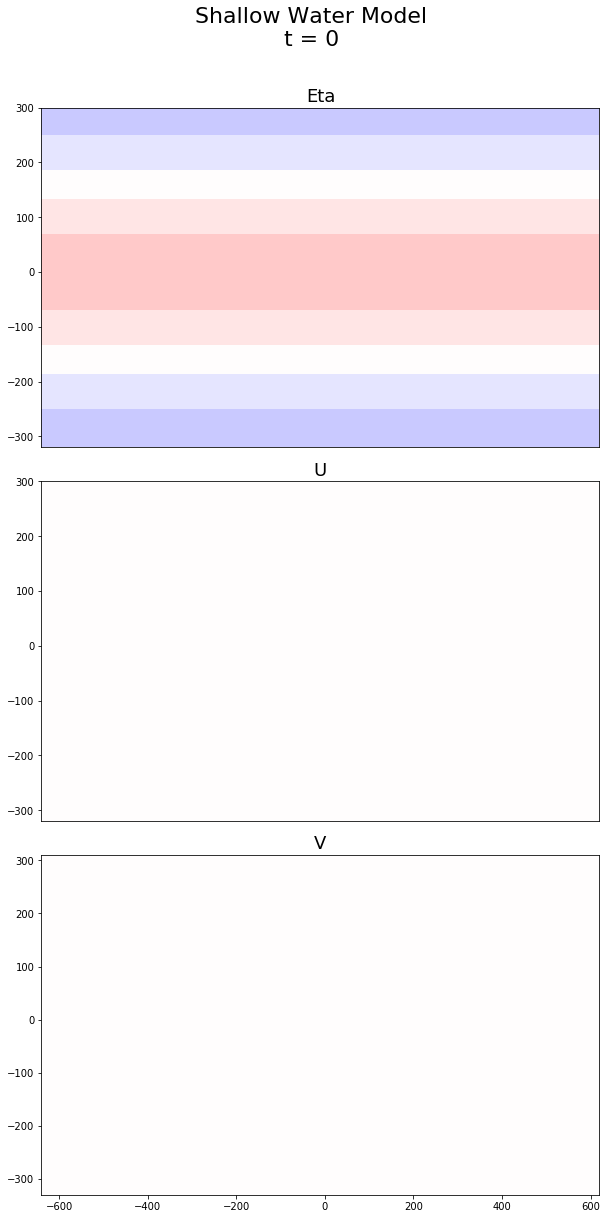

In [49]:
# standing wave
p[0] = wave(XP,YP,.1,0,2,1280,640)

UpdatePlots(0,p[0],u[0],v[0],XP,YP,XU,YU,XV,YV)

In [50]:
# initial budget
energy0, enstrophy0 = calc_budget(p[0],u[0],v[0],depth+p[0],f,g,dxx,dyy)

print('Initial Energy: ',np.max(energy0))
print('Initial Enstrophy: ',np.max(enstrophy0))

Initial Energy:  0.05000000000000001
Initial Enstrophy:  0.0


### Iterations

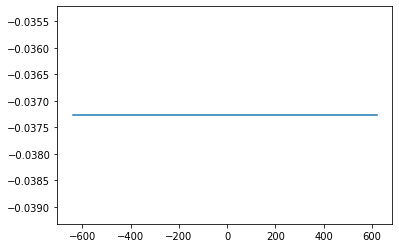

In [52]:
plt.plot(XP[16,:],p[200,16,:])

$\delta$Energy:  -2.3551623867384963e-06
$\delta$Enstrophy:  0.0
$\delta$Energy:  -0.0029657059619783016
$\delta$Enstrophy:  0.0
$\delta$Energy:  -0.013131426092621669
$\delta$Enstrophy:  0.0
$\delta$Energy:  -0.017200007056999284
$\delta$Enstrophy:  0.0
$\delta$Energy:  -0.004968182368405828
$\delta$Enstrophy:  0.0
$\delta$Energy:  -0.00017108454331747625
$\delta$Enstrophy:  0.0
$\delta$Energy:  -0.0034615781639816823
$\delta$Enstrophy:  0.0
$\delta$Energy:  -0.013532445582526094
$\delta$Enstrophy:  0.0


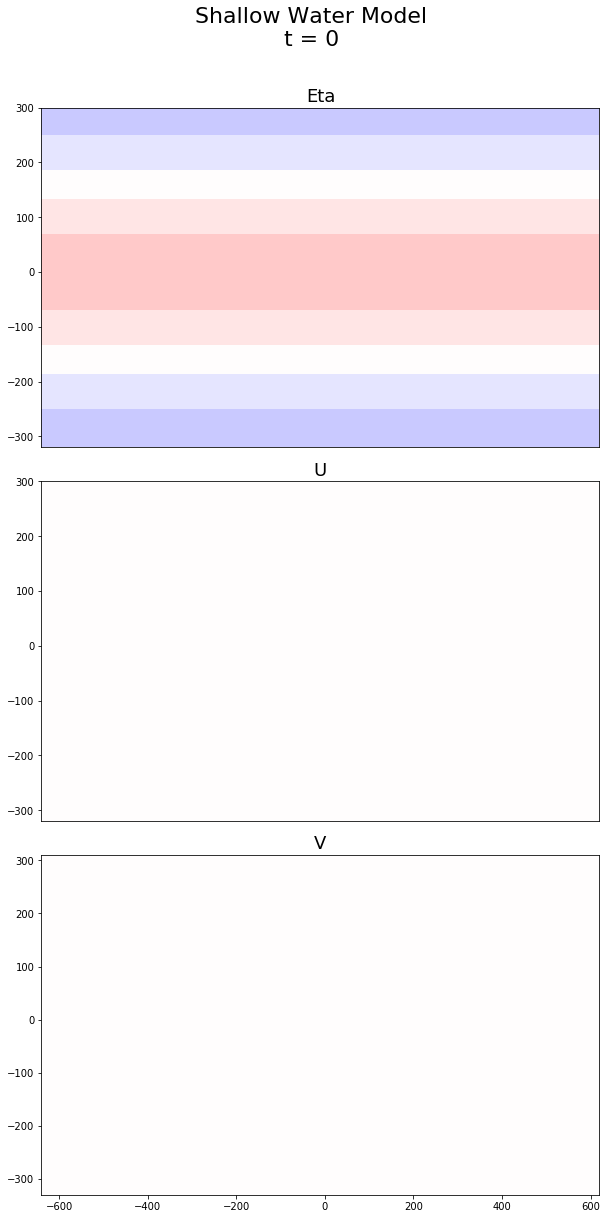

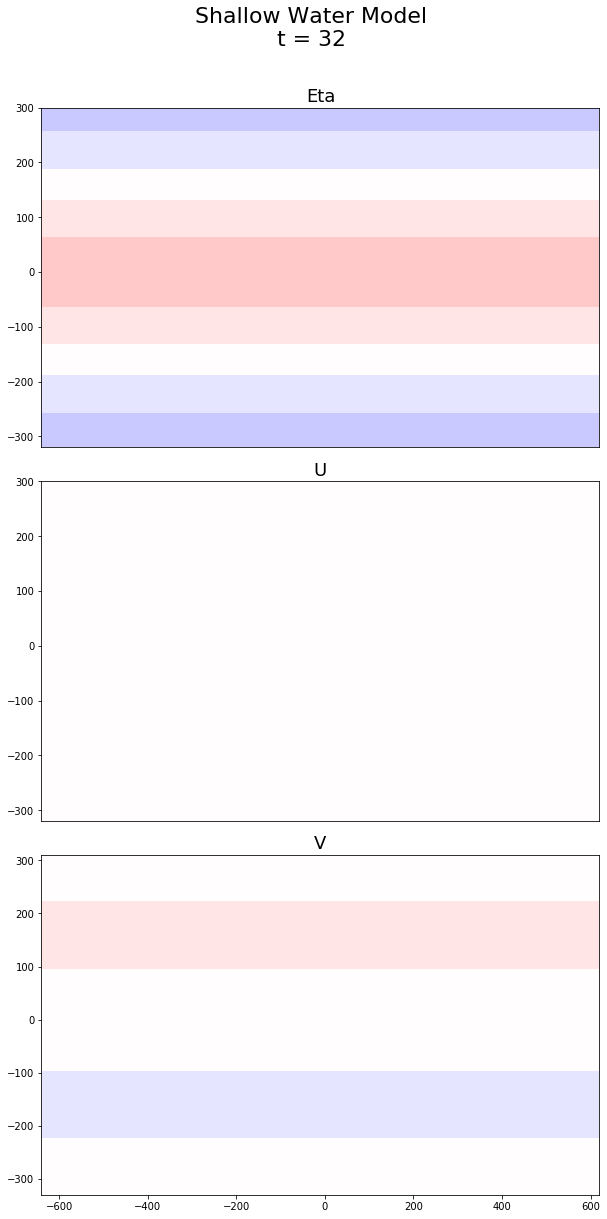

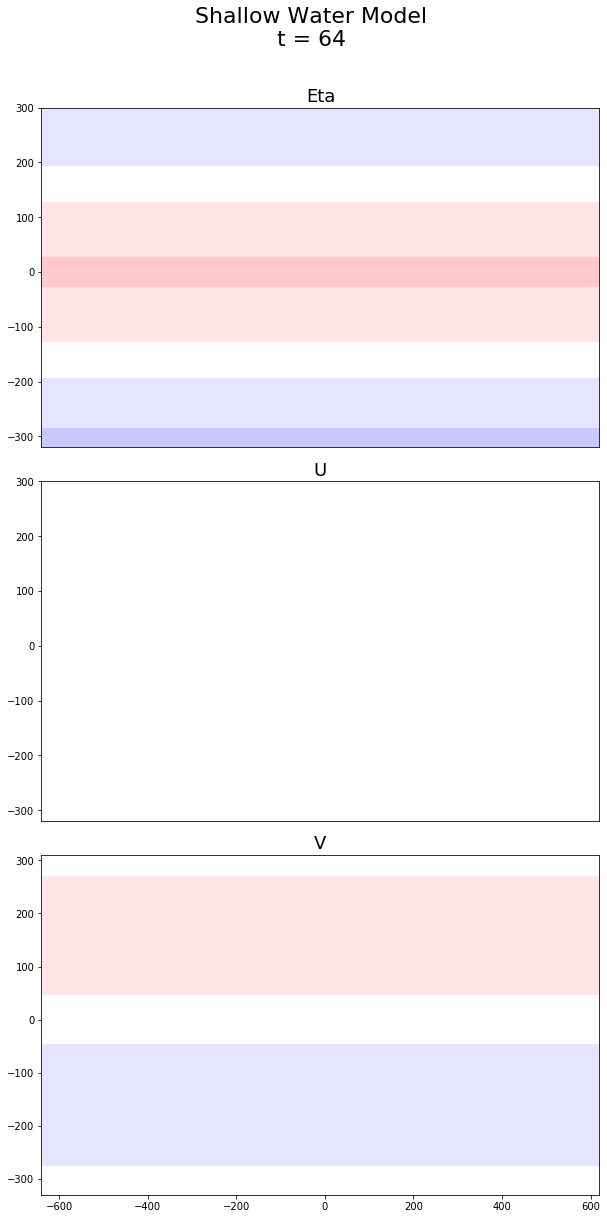

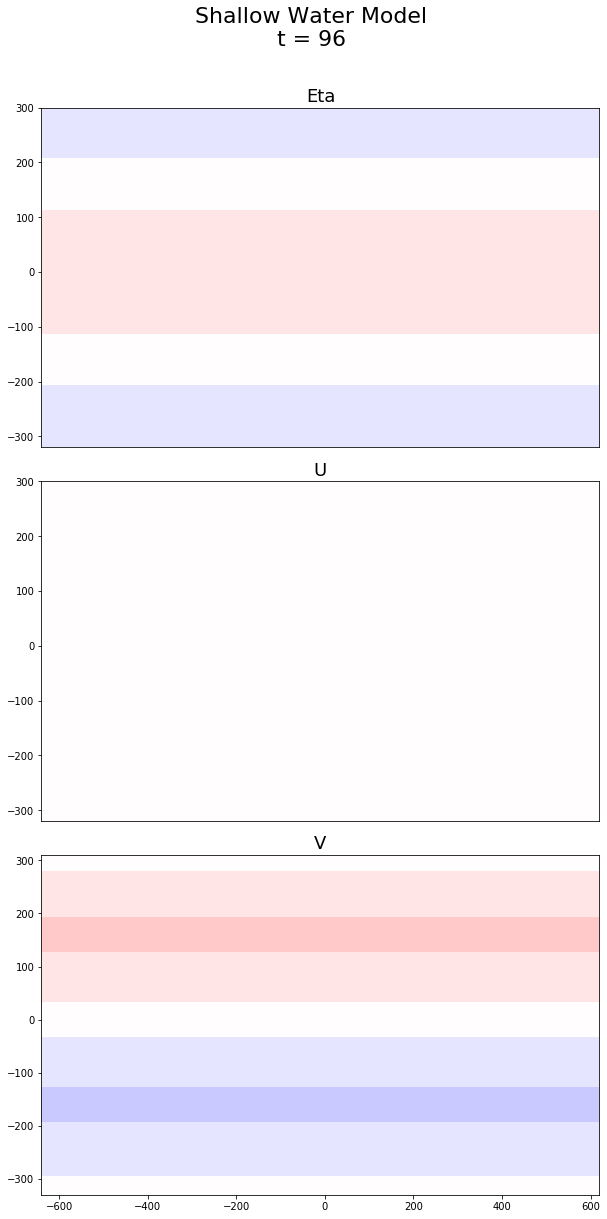

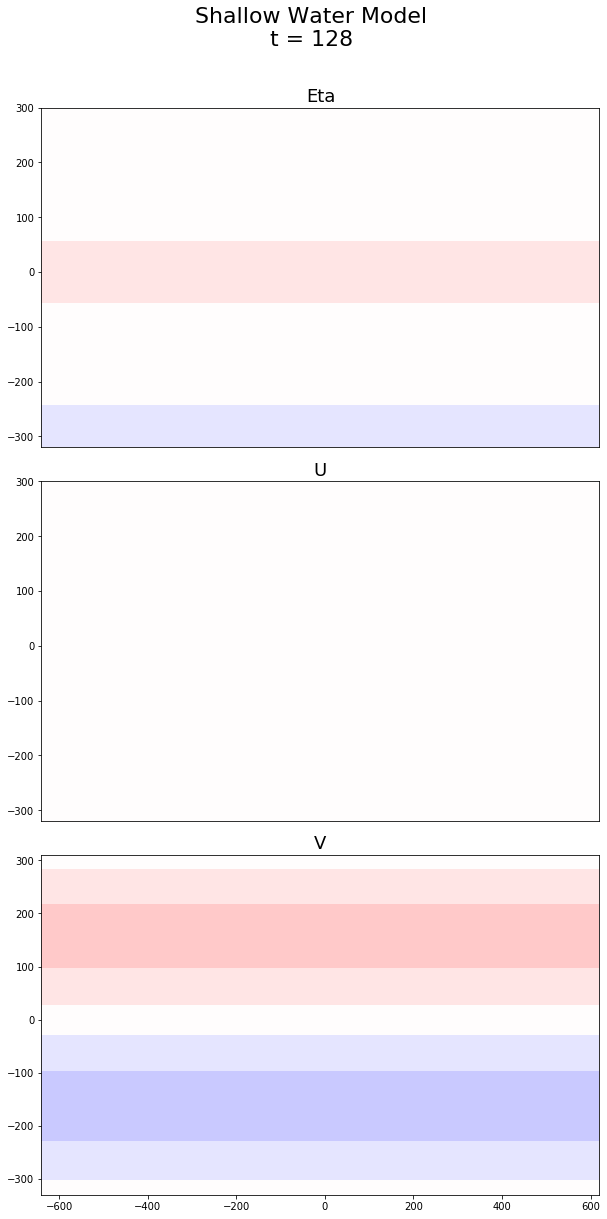

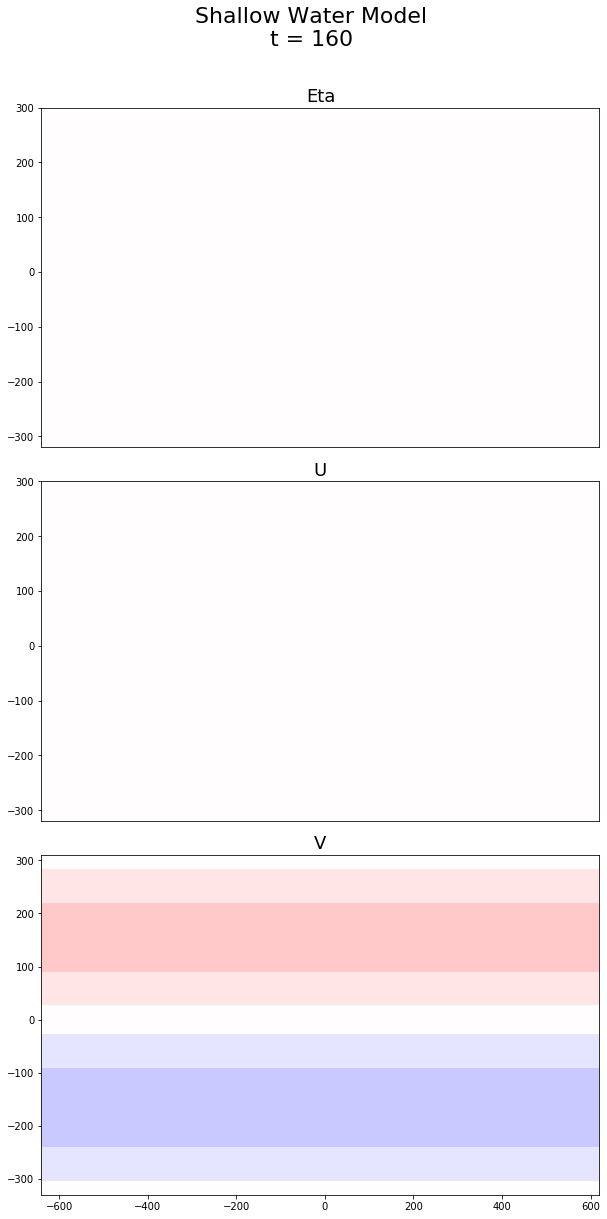

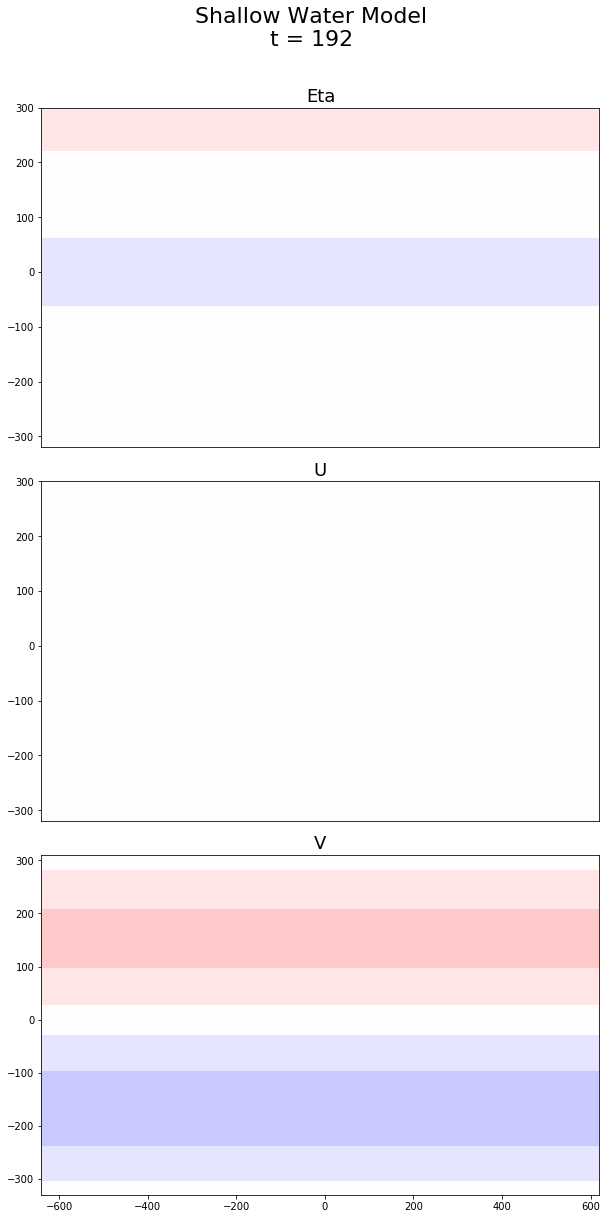

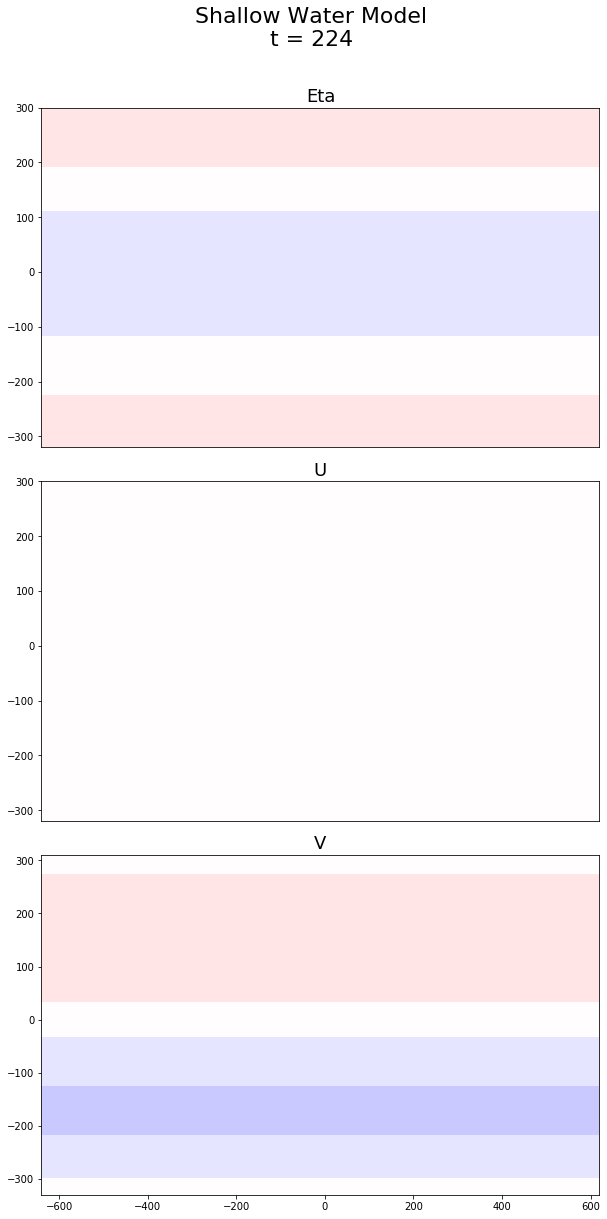

In [51]:
for it in range(nt-1):
    p[it+1],u[it+1],v[it+1] = RK3Step(p[it],u[it],v[it],f,depth,g,dxx,dyy,dt)
    BC(u[it+1],v[it+1],0)
    if (it%snapfreq == 0):
        # diagnostics
        energy,enstrophy = calc_budget(p[it+1],u[it+1],v[it+1],depth+p[it+1],f,g,dxx,dyy)
        print(r'$\delta$Energy: ',np.max(energy)-np.max(energy0))
        print(r'$\delta$Enstrophy: ',np.max(enstrophy)-np.max(enstrophy0))

        # plot solution
        UpdatePlots(it,p[it+1],u[it+1],v[it+1],XP,YP,XU,YU,XV,YV)